# EI2001: Ciencia de Datos en Astronomía

**Profesores:** Pía Cortés, Daniela Barrientos, Matías Suazo, Matías Mattamala

## Minitarea 2: Uso de NumPy y matplotlib

**Objetivos:**

1. Poner en práctica el uso de librerías en python (específicamente NumPy y matplotlib)
2. Familiarizarse con el concepto de ndarray
3. Realizar gráficos personalizados


**Instrucciones:**

1. Lean cuidadosamente todo lo que viene ahora
2. Para hacer esta tarea deben que hacer un **fork** del repositorio en sus cuentas de GitHub.
4. Abrir [Google Colab](https://colab.research.google.com) y seleccionar "abrir un archivo desde GitHub". Deben seleccionar su cuenta Github y escoger el repositorio que corresponde al fork que hicieron.
5. Si todo sale bien, debería abrirse una copia de este notebook en su cuenta de Google Colab.
6. Se adjuntan 6 mini actividades a completar. **TODAS** son necesarias y deben completar lo que se va pidiendo.
7. Cada vez que completen un ítem, deben guardar un avance en su fork de GitHub, de modo de **respaldar cada avance significativo**. Usen comentarios coherentes con cada respaldo "Sección 1 completa", "Tarea terminada", no solamente el que pone por defecto.



## 1. Cargar datos

Para esta minitarea trabajaremos con la fotometría de algunas estrellas. El objetivo final de esta actividad es obtener un gráfico llamado **Diagrama de Color-Magnitud (CMD)**, este es una variante del [Diagrama de Hertzsprung Russell](https://en.wikipedia.org/wiki/Hertzsprung%E2%80%93Russell_diagram) (o diagrama HR) cuyo objetivo es ver la distribución en Brillo y Color (Luminosidad y Temperatura para el diagrama HR) de las estrellas de una población. Con este se puede reconocer las distintas etapas evolutivas en las que se encuentran las estrellas, sus edades y metalicidades. 


Comienza por cargar los datos de una población sintética. En el repositorio se encuentra el archivo de texto llamado **`phot.dat`** que contiene:

1. Fotometría en las bandas B, V, R, I (magnitud aparente)
2. Temperatura ($log_{10}(T_{eff} / K)$)
3. Masa [$M_{\odot}$]
4. Distancia [kpc] 


* Carga los datos a formato `ndarray` en la variable `datos` e inspecciona su forma y tamaño, como tambien las diferentes columnas.

In [73]:
import numpy as np

# Carga los datos a un ndarray

archivo = 'https://raw.githubusercontent.com/astrodatos/minitarea2/master/phot.dat'
datos = np.loadtxt(archivo)

# Inspecciona su forma y tamaño

print ('\nForma matriz de datos:\n' + str(datos.shape))
print ('\nTamaño matriz de datos:\n' + str(datos.size))

for i in [0, 1, 2, 3, 4, 5, 6]:
  print ('\nForma columna ' + str(i) + ':\n' + str(datos[:, i].shape))
  print ('\nTamaño columna ' + str(i) + ':\n' + str(datos[:, i].size))
  


Forma matriz de datos:
(5298, 7)

Tamaño matriz de datos:
37086

Forma columna 0:
(5298,)

Tamaño columna 0:
5298

Forma columna 1:
(5298,)

Tamaño columna 1:
5298

Forma columna 2:
(5298,)

Tamaño columna 2:
5298

Forma columna 3:
(5298,)

Tamaño columna 3:
5298

Forma columna 4:
(5298,)

Tamaño columna 4:
5298

Forma columna 5:
(5298,)

Tamaño columna 5:
5298

Forma columna 6:
(5298,)

Tamaño columna 6:
5298


## 2. Histogramas

El siguiente paso es inspeccionar los elementos en las diferentes columnas. Para ello crearás histogramas de algunas variables de interés. 

* Haz una figura con dos gráficos, uno al lado del otro, que contengan:

    1. Un histograma con las distribuciones de las magnitudes en las bandas B y V
    2. Un histograma con la distribución de masas

No olvides poner nombres a los ejes, titulos, leyendas, etc. Se creativo en el estilo de tu gráfico!

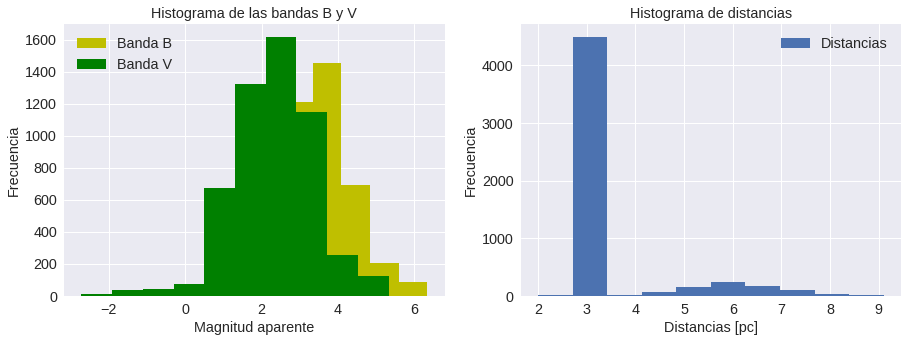

In [88]:
#Plotear histogramas de cada columna

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams

params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
rcParams.update(params)

columnaB = datos[:, 0]
columnaV = datos[:, 1]
columnaD = datos[:,6]

fig, ax = plt.subplots(figsize = (15,5), ncols = 2)

ax[0].hist(columnaB, color = 'y', label = 'Banda B')
ax[0].hist(columnaV, color = 'g', label = 'Banda V')
ax[0].set_xlabel('Magnitud aparente')
ax[0].set_ylabel('Frecuencia')
ax[0].set_title('Histograma de las bandas B y V')
ax[0].legend(loc='best')

ax[1].hist(columnaD, label = 'Distancias')
ax[1].set_xlabel('Distancias [pc]')
ax[1].set_ylabel('Frecuencia')
ax[1].set_title('Histograma de distancias')
ax[1].legend(loc='best')

## 3. Filtrar datos

Como te habrás dado cuenta hay dos distribuciones de distancia. La mayoría de las estrellas corresponden a la población sintética creada, mientras que el resto son estrellas de fondo. Para estudiar nuestro cúmulo, primero debemos filtrar las estrellas que no pertenecen a él. 

* Haz una copia del set de datos originales en la variable `datos_filtrados` y sólo utiliza las estrellas que cumplan con un criterio basado en el histograma anterior.
* Imprime en pantalla el tamaño original del set de datos y del nuevo filtrado con el siguiente formato: _"El set original contenía X estrellas, luego de filtrar quedaron X"_


In [75]:
#Filtrar por distancia

datos_filtrados = datos.copy()[columnaD <= 3]


print('El set original contenía ' + str(datos.size) + ' estrellas, luego de filtrar quedaron ' + str(datos_filtrados.size) + '.')

El set original contenía 37086 estrellas, luego de filtrar quedaron 16275.


## 4. Función Magnitud Absoluta

Para hacer el CMD necesitamos la magnitud absoluta de nuestras estrellas. Para esto crearemos una función que la calcule.

* Crea la función **`mag_abs(mag_ap, dist)`** de la siguiente forma:
    * **Input:** 
        1. `mag_ap`: ndarray de magnitudes aparentes
        2. `dist`: ndarray de distancias en unidades de [parsec]
    * **Output:**
        1. `mag_abs`: ndarray de magnitudes absolutas calculadas como: $M = m - 5 \log_{10} (d_{pc}) + 5 $

In [0]:
#Funcion mag_abs(mag, dist)

mag_ap = datos_filtrados[:, 0:4]
dist = datos_filtrados[:, 6]

def mag_abs(mag_ap, dist):
    M1 = mag_ap[:, 0] - 5*np.log10(dist) + 5
    M2 = mag_ap[:, 1] - 5*np.log10(dist) + 5
    M3 = mag_ap[:, 2] - 5*np.log10(dist) + 5
    M4 = mag_ap[:, 3] - 5*np.log10(dist) + 5
    Malfa = np.c_[M1, M2]
    Mbeta = np.c_[M3, M4]
    Mprima = np.c_[Malfa, Mbeta]
    return Mprima
    

## 5. CMD

Ahora podemos graficar nuestro Diagrama Color Magnitud. 

* Crea los siguientes arreglos:
    1. `MV`: magnitud absoluta en la banda V
    2. `color`: resta entre las magnitudes B y V (B-V)
* Grafica MV vs color como se muestra en la siguiente [figura](https://www.astro.rug.nl/~ahelmi/galaxies_course/class_II/47tuc.gif). (**Hint: pon atención a los ejes)

Text(0.5,1,'Mag. absoluta V v/s (B-V)')

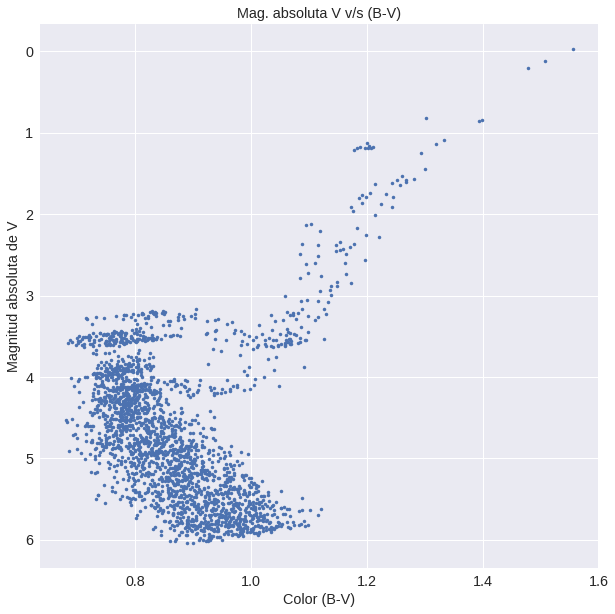

In [89]:
#Crear arrays MV y color
MV = mag_abs(mag_ap,dist)[:,1]
color = mag_ap[:, 0] - mag_ap[:, 1]

#plot cmd
fig, ax = plt.subplots(figsize = (10,10))
ax.plot(color, MV, '.')
ax.invert_yaxis()
ax.set_xlabel('Color (B-V)')
ax.set_ylabel('Magnitud absoluta de V')
ax.set_title('Mag. absoluta V v/s (B-V)')

## 6. Densidades y otros

Ahora crearemos gráficos con un poco más de información en color. 
* Haz una figura con dos gráficos, uno al lado del otro:
    1. `MV vs color`, poninedo las masas de cada estrella en color (recuerda la barra de colores)
    2. `MV vs color`, poniendo la Temperatura de cada estrella en color
* Haz una figura con un gráfico que contenga:
    1. [Histograma en 2D](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist2d.html) con ejes `MV vs color` (esta figura muestra la densidad de estrellas en el espacio `MV vs color`)
    
No olvides poner **SIEMPRE** ejes a tus figuras, titulos, leyendas, etc. Elige mapas de colores donde se noten las características de los gráficos.

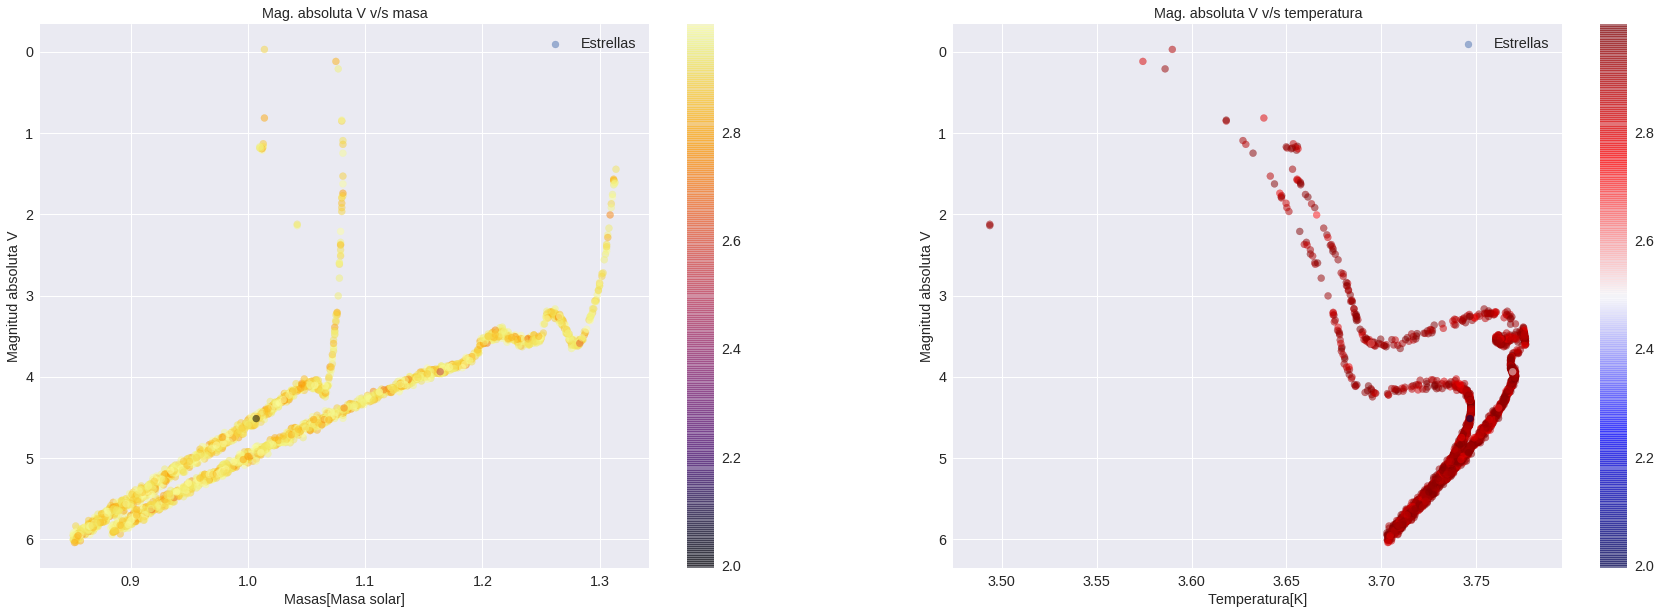

In [90]:
# plot cmd + masa / smd + temp
MV = mag_abs(mag_ap,dist)[:,1]
color1 = datos_filtrados[:,5]
color2 = datos_filtrados[:,4]
importante = datos_filtrados[:,-1]

fig, ax = plt.subplots(figsize = (30,10), ncols = 2)
cb1 = ax[0].scatter(color1, MV, label = 'Estrellas', c = importante, alpha = 0.5, cmap = 'inferno')
fig.colorbar(cb1, ax = ax[0])
ax[0].invert_yaxis()
ax[0].set_xlabel('Masas[Masa solar]')
ax[0].set_ylabel('Magnitud absoluta V')
ax[0].set_title('Mag. absoluta V v/s masa')
ax[0].legend(loc='best')

cb2 = ax[1].scatter(color2,MV,label= 'Estrellas', c = importante, alpha = 0.5, cmap = 'seismic')
fig.colorbar(cb2, ax = ax[1])
ax[1].invert_yaxis()
ax[1].set_xlabel('Temperatura[K]')
ax[1].set_ylabel('Magnitud absoluta V')
ax[1].set_title('Mag. absoluta V v/s temperatura')
ax[1].legend(loc='best')

Text(0.5,1,'Histograma 2D MV v/s (B-V)')

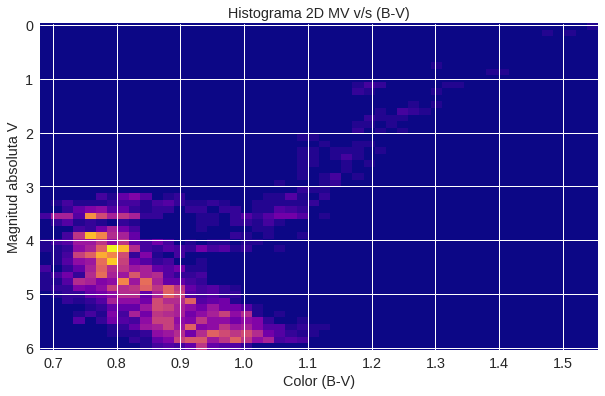

In [99]:
# plot cmd hist2D
fig, ax = plt.subplots(figsize = (10,6))
ax.hist2d(color, MV, bins = 50, cmap = 'plasma')
ax.invert_yaxis()
ax.set_xlabel('Color (B-V)')
ax.set_ylabel('Magnitud absoluta V')
ax.set_title('Histograma 2D MV v/s (B-V)')